## Climate Data-Base from CONCITO

**## Exploratery Analysis (EDA)**

In [8]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:

# Importing the required libaries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset
import warnings
warnings.filterwarnings("ignore")
from colorama import Fore, Back, Style

class FoodCo2Analytics():
    # Import data
    def datareader(self, data_link):
        self.data_link= data_link
        # Loading the data into the data-frame
        col_names= ["id", "Product_dk", "Category_dk", "Product_en", "Category_en", "Unit", "Agriculture", "iLUC", "Processing", "Packaging", "Transport", "Retail", "Total_CO2_eq/kg", "Energy_KJ", "Fat_g", "Carb_g", "Protein_g", "Data_Source", "Comments", "GPC_Level4_en", "ID_Food", "ID_Pack", "ID_Retail", "GPC_Category_en", "GPC_Category_dk", "GPC_Level4_dk", "product_type", "GPC_level1", "Food_group", "GPC_level2", "Un/Processed", "GPC_Level3", "Extra_category"]
        # Read data with Pandas as Excel.
        # Original columns name are replaced with ralavant names (col_names)
        data= pd.read_excel(data_link, sheet_name=1, index_col=False, header=None, skiprows=1, names= col_names).round(decimals = 2)
        cols_to_use= ["Product_en", "Category_en", "Agriculture", "iLUC", "Processing", "Packaging", "Transport", "Retail", "Total_CO2_eq/kg", "Energy_KJ", "Fat_g", "Carb_g", "Protein_g"]
        selected_data= data.loc[:, cols_to_use].round(decimals = 2)
        # I could not change or replace NaN value with replace() or fillna() method, which i would like to replace with 3.5 and 13.0. So i use inefficient method.
        selected_data["Carb_g"].iloc[49:50]= 3.5
        selected_data['Protein_g'].iloc[49:50]= 13.0
        selected_data[["Carb_g", 'Protein_g']].iloc[49:50]
        #"""Everything look okey by now"""
        # Group some of the elements from columns with categorical data
        
        """#"Beef, fillet, defatted, raw" row have very high difference with other row. so during the EDA process this row is counted as outlier. to have better overview and analytics, this row should be dropped. 
        On the other hand "Water, tap, drinking, average values" row have 0 value so, we have no use of this row, so also will dorp this row."""

        to_drop1= selected_data[selected_data["Product_en"] == "Water, tap, drinking, average values"].index
        to_drop2= selected_data[selected_data["Product_en"] == "Beef, fillet, defatted, raw"].index
        to_drop= [to_drop1[0], to_drop2[0]]
        selected_dropped_data= selected_data.drop(labels=to_drop, inplace=False)

        #df_with_category=selected_dropped_data[['Category_en', 'Agriculture', 'iLUC', 'Processing',	'Packaging',	'Transport',	'Retail', 'Total_CO2_eq/kg']].groupby(by= ['Category_en'], sort=True).mean().sort_values(by=['Total_CO2_eq/kg'], ascending=False).round(decimals = 2)
        return selected_dropped_data

    def co2_data_plot(self, selected_dropped_data):
        self.selected_dropped_data= selected_dropped_data
        # Group some of the elements from columns with categorical data
        df_with_category= selected_dropped_data[['Category_en', 'Agriculture', 'iLUC', 'Processing',	'Packaging',	'Transport',	'Retail', 'Total_CO2_eq/kg']].groupby(by= ['Category_en'], sort=True).mean().sort_values(by=['Total_CO2_eq/kg'], ascending=False).round(decimals = 2)
        
        # Stacked bar plot
        rows= selected_dropped_data.shape[0]
        fig, ax= plt.subplots(figsize=(15, 10))
        ax.barh(df_with_category.index, df_with_category['Agriculture'], label= "Agriculture")
        ax.barh(df_with_category.index, df_with_category['iLUC'], label='iLUC')
        ax.barh(df_with_category.index, df_with_category['Packaging'], label='Packaging')
        ax.barh(df_with_category.index, df_with_category['Transport'], label='Transport')
        ax.barh(df_with_category.index, df_with_category['Retail'], label='Retail')

        plt.xticks(rotation=50)
        plt.title("Total CO2 equivalent per Kilo Gram of the Product Category")
        plt.ylabel("Product Category")
        plt.xlabel("Total average CO2 equivalent/Kg")
        ax.legend()
        #plt.savefig("portfolio/static/co2_data_plot_toshow.png")
        #graph = fig.to_html(full_html=False, default_height=500, default_width=700)
        #plt.close() 

    def selected_foodinfo(selected_dropped_data):
        self.selected_dropped_data=selected_dropped_data
        name_choosen =  selected_dropped_data.sample().reset_index(drop=True)

        def block(self):
            print("*" * 60)
            print(Fore.GREEN + f'Food product choosen: \t{name_choosen._get_value(0, "Product_en")}')
            print("." * 40) 
            print(Fore.RED + f'Food category releted to: \t{name_choosen._get_value(0, "Category_en")}')
            print("." * 40)
            print(Fore.GREEN + f'Total CO2 emission contribution:\t{name_choosen._get_value(0, "Total_CO2_eq/kg")}')
            print(Style.RESET_ALL)
            print(f'\t Agriculture = {name_choosen._get_value(0, "Agriculture")}, \n\t iLUC = {name_choosen._get_value(0, "iLUC")}, \n\t Processing = {name_choosen._get_value(0, "Processing")}, \n\t Packaging = {name_choosen._get_value(0, "Packaging")}, \n\t Transport = {name_choosen._get_value(0, "Transport")}, \n\t Retail = {name_choosen._get_value(0, "Retail")}')
            print("." * 40)
            print(Fore.GREEN + f'Total Energy_KJ: \t{name_choosen._get_value(0, "Energy_KJ")}')
            print(Style.RESET_ALL)
            print(f'\t Fat amount = {name_choosen._get_value(0, "Fat_g")}, \n\t Carb amount = {name_choosen._get_value(0, "Carb_g")}, \n\t Protein amount = {name_choosen._get_value(0, "Protein_g")}')
            print("*" * 60)
        return block()

In [32]:
#Lets use function to read data
data_link = "https://github.com/mrchapagain/FoodClimateAnalytics/raw/main/ClimateData.xlsx" # glob.glob(path + '*.xlsx')

fooddatas= FoodCo2Analytics()
m=fooddatas.datareader(data_link).sort_values(by=['Total_CO2_eq/kg'], ascending=False).round(decimals = 2)

# Rows of the 5 higest and 5 least CO2 contributor
m.tail(5).append(m.head(5)).head(2)

,Product_en,Category_en,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg,Energy_KJ,Fat_g,Carb_g,Protein_g
165,"Cabbage, Chinese, pak-choi, raw",Vegetables,0.1,0.02,0.0,0.06,0.05,0.01,0.25,61.0,0.2,1.2,1.5
156,"Cabbage, white, raw",Vegetables,0.1,0.02,0.0,0.06,0.05,0.01,0.25,133.0,0.2,4.5,1.2


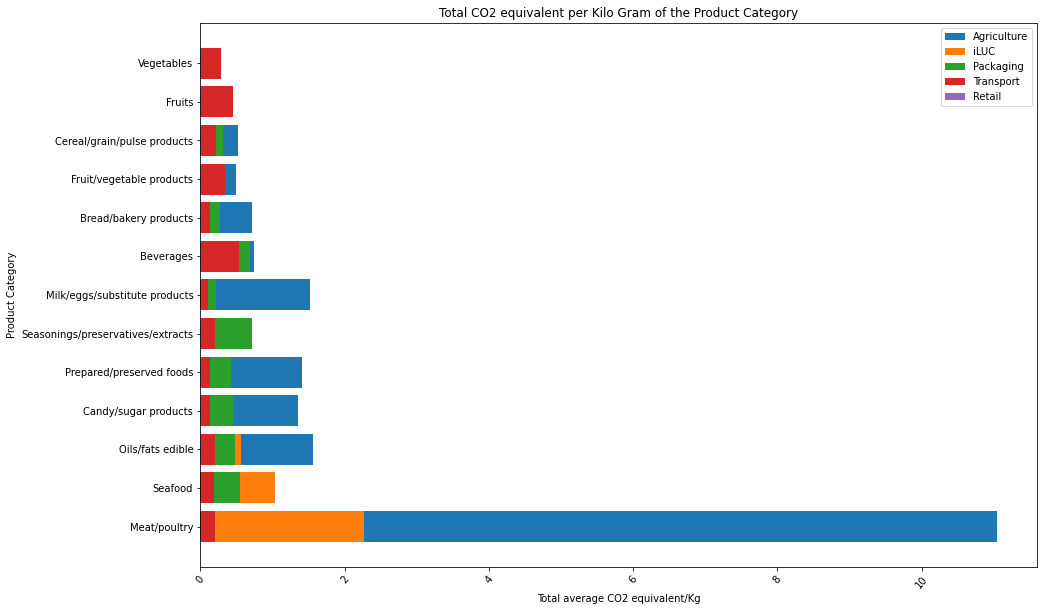

In [11]:
co2_data_plot(fooddatas)

In [25]:
selected_foodinfo(fooddatas)

AttributeError: ignored